<a target="_blank" href="https://colab.research.google.com/github/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/03_hallucinations.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 03. Hallucinations
## Overview  
In this exercise, we will explore the concept of hallucinations in large language models using the Solar framework. Hallucinations refer to instances where the model generates information that is not based on the input data or is factually incorrect. This notebook will help you understand why hallucinations occur and how to mitigate them to ensure the reliability and accuracy of the model's outputs.

## Purpose of the Exercise
The purpose of this exercise is to identify and address the issue of hallucinations in language models. By the end of this tutorial, users will be able to recognize hallucinations, understand their causes, and apply strategies to minimize their occurrence, thereby improving the trustworthiness and usability of the Solar LLM.


In [ ]:
! pip3 install -qU langchain-upstage python-dotenv

## UPSTAGE_API_KEY
To obtain your Upstage API key, follow these steps:

1. Visit the Upstage AI console at <https://console.upstage.ai>.
2. Sign up for an account if you don't already have one.
3. Log in to your account.
4. Navigate to the API key section.
5. Generate your API key.
6. Copy the key and save it securely.

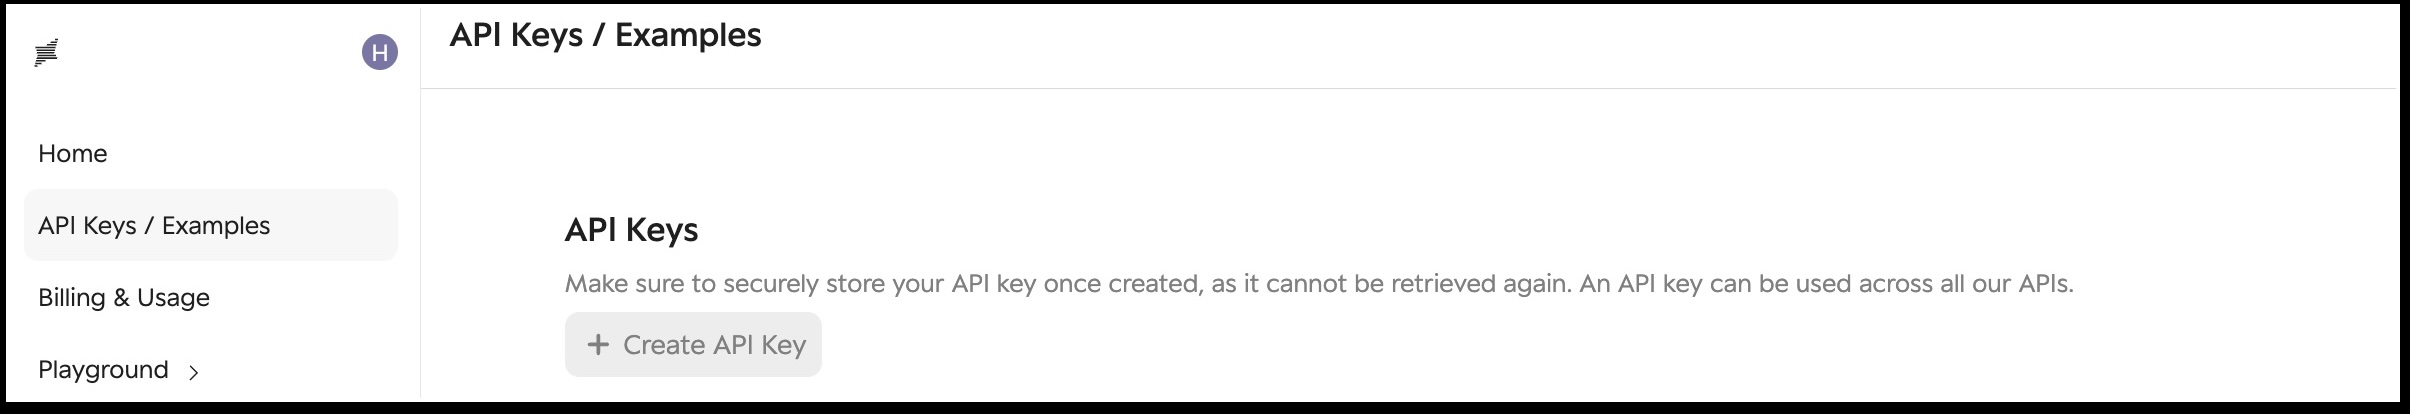

In [ ]:
# @title set API key
from pprint import pprint
import os

import warnings

warnings.filterwarnings("ignore")

if "google.colab" in str(get_ipython()):
    # Running in Google Colab. Please set the UPSTAGE_API_KEY in the Colab Secrets
    from google.colab import userdata

    os.environ["UPSTAGE_API_KEY"] = userdata.get("UPSTAGE_API_KEY")
else:
    # Running locally. Please set the UPSTAGE_API_KEY in the .env file
    from dotenv import load_dotenv

    load_dotenv()

assert (
    "UPSTAGE_API_KEY" in os.environ
), "Please set the UPSTAGE_API_KEY environment variable"

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_upstage import ChatUpstage

llm = ChatUpstage()
prompt_template = PromptTemplate.from_template(
    """
Q: What is DUS developed from Upstage?

A:
"""
)
chain = prompt_template | llm | StrOutputParser()
chain.invoke({})

'DUS (Distributed Universal Services) is a software platform that is developed from Upstage. Upstage is a cloud-based platform that provides a range of services, including video conferencing, collaboration tools, and communication services. DUS is an extension of Upstage that provides a more comprehensive set of services, including distributed computing, storage, and networking services. DUS is designed to be a flexible and scalable platform that can be used to build and deploy a wide range of applications and services.'

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_upstage import ChatUpstage

llm = ChatUpstage()
prompt_template = PromptTemplate.from_template(
    """
Q: What is DUS developed from Google?

A:
"""
)
chain = prompt_template | llm | StrOutputParser()
chain.invoke({})

'DUS is a tool developed from Google that allows developers to test and debug their applications. It stands for "Debugging and Profiling for Android Studio." DUS provides a set of features that help developers identify and fix issues in their applications, such as memory leaks, performance bottlenecks, and other issues that can affect the overall quality of the application.\n\nDUS was developed by Google as a part of the Android Studio IDE, which is a popular development environment for building Android applications. It is designed to work seamlessly with Android Studio, providing developers with a comprehensive set of tools and features to help them build high-quality applications.\n\nOne of the key features of DUS is its ability to provide real-time feedback and insights into the performance of an application. Developers can use DUS to monitor the memory usage, CPU usage, and network activity of their applications, and identify any issues that may be affecting the performance of the 

![hallucination](https://github.com/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/figures/hallucination.png?raw=1)

## Next Token Prediction
They are designed to generate the next words. It's also very difficult to know what we don't know.

![](https://jalammar.github.io/images/xlnet/gpt-2-autoregression-2.gif)

Image from https://jalammar.github.io/illustrated-gpt2/

# Excercise

Think of ways to prevent Large Language Models (LLMs) from generating incorrect information.